# Projet Mobility AMDM

In [24]:
import pandas as pd
import movingpandas as mpd
from datetime import timedelta
import hvplot.pandas  # Active l'extension hvplot pour pandas/geopandas
import holoviews as hv
# Active le moteur de rendu Bokeh (nécessaire pour l'interactif dans Jupyter)
hv.extension('bokeh')

## chargement de la donnée

In [25]:
df_log= pd.read_csv("Data/GPS_log.csv",sep=";")

In [26]:
df_log.head()

,timestamp,lat,lon
0,2019-10-21 13:45:24+00,48.813044,2.148510
1,2019-10-21 13:45:40+00,48.813049,2.148507
2,2019-10-21 13:46:03+00,48.813049,2.148505
3,2019-10-21 13:46:28+00,48.813043,2.148513
4,2019-10-21 13:46:48+00,48.813049,2.148505


In [27]:
df_log.dtypes

timestamp     object
lat          float64
lon          float64
dtype: object

In [28]:
df_log['timestamp'] = pd.to_datetime(df_log['timestamp'])

In [29]:
df_log.dtypes

timestamp    datetime64[ns, UTC]
lat                      float64
lon                      float64
dtype: object

In [30]:
#changement de l'index de dataframe
df_log = df_log.set_index('timestamp')

In [31]:
df_log.head()

,lat,lon
timestamp,,
2019-10-21 13:45:24+00:00,48.813044,2.148510
2019-10-21 13:45:40+00:00,48.813049,2.148507
2019-10-21 13:46:03+00:00,48.813049,2.148505
2019-10-21 13:46:28+00:00,48.813043,2.148513
2019-10-21 13:46:48+00:00,48.813049,2.148505


In [32]:
track = mpd.Trajectory(df_log, traj_id=1, x='lon', y='lat')

C:\Users\latif\anaconda3\Lib\site-packages\movingpandas\trajectory.py:158: TimeZoneWarning: Time zone information dropped from trajectory. All dates and times will use local time. This is applied by doing df.tz_localize(None). To use UTC or a different time zone, convert and drop time zone information prior to trajectory creation.
  warnings.warn(


In [33]:
print(f"Trajectoire complète : {track}")

Trajectoire complète : Trajectory 1 (2019-10-21 13:45:24 to 2019-10-28 12:31:02) | Size: 68808 | Length: 665972.4m
Bounds: (2.03762666666667, 48.7095233333333, 2.26096666666667, 48.8972016666667)
LINESTRING (2.1485104 48.8130436, 2.1485067 48.8130489, 2.1485049 48.813049, 2.1485134 48.8130434, 2


## Segmentation par de la trajectoire par jour

In [34]:
trj_day = mpd.TemporalSplitter(track).split(mode="day")

C:\Users\latif\anaconda3\Lib\site-packages\movingpandas\trajectory_splitter.py:132: UserWarning: Temporal splitting results contain observation gaps that exceed your split size of D. Consider running the ObservationGapSplitter to further clean the results.
  warnings.warn(
C:\Users\latif\anaconda3\Lib\site-packages\movingpandas\trajectory_splitter.py:142: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[next_index] = next_values
C:\Users\latif\anaconda3\Lib\site-packages\movingpandas\trajectory.py:186: MissingCRSWarning: Trajectory generated without CRS. Computations will use Euclidean distances.
  warnings.warn(
C:\Users\latif\anaconda3\Lib\site-packages\movingpandas\trajectory_splitter.py:142: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the cave

In [38]:
print(f"Nombre de trajectoires : {len(trj_day)}")

Nombre de trajectoires : 7


In [39]:
# 4. Vérification rapide
for traj in trj_day:
    print(f"Jour : {traj.get_start_time().date()} | Points : {len(traj.df)}")

Jour : 2019-10-21 | Points : 8160
Jour : 2019-10-22 | Points : 18974
Jour : 2019-10-23 | Points : 20352
Jour : 2019-10-24 | Points : 5771
Jour : 2019-10-25 | Points : 5826
Jour : 2019-10-26 | Points : 3418
Jour : 2019-10-28 | Points : 6313


In [40]:
# ajout de la vitesse au traj

In [41]:
trj_day.add_speed(overwrite=True)

TrajectoryCollection with 7 trajectories

In [42]:
print(trj_day.trajectories[0].df.head())

                                     geometry traj_id         speed
timestamp                                                          
2019-10-21 13:45:24  POINT (2.14851 48.81304)     1_0  4.039841e-07
2019-10-21 13:45:40  POINT (2.14851 48.81305)     1_0  4.039841e-07
2019-10-21 13:46:03   POINT (2.1485 48.81305)     1_0  7.838155e-08
2019-10-21 13:46:28  POINT (2.14851 48.81304)     1_0  4.071560e-07
2019-10-21 13:46:48   POINT (2.1485 48.81305)     1_0  5.158730e-07


## Visualisation des trajectoires journalieres

In [43]:
# On parcourt chaque trajectoire (chaque jour) dans la collection
for traj in trj_day:
    # On accède au DataFrame de ce jour spécifique et on crée la colonne
    traj.df['datetime'] = traj.df.index

# Vérification : on regarde le premier jour pour voir si la colonne est là
print(trj_day.trajectories[0].df.head())

                                     geometry traj_id         speed  \
timestamp                                                             
2019-10-21 13:45:24  POINT (2.14851 48.81304)     1_0  4.039841e-07   
2019-10-21 13:45:40  POINT (2.14851 48.81305)     1_0  4.039841e-07   
2019-10-21 13:46:03   POINT (2.1485 48.81305)     1_0  7.838155e-08   
2019-10-21 13:46:28  POINT (2.14851 48.81304)     1_0  4.071560e-07   
2019-10-21 13:46:48   POINT (2.1485 48.81305)     1_0  5.158730e-07   

                               datetime  
timestamp                                
2019-10-21 13:45:24 2019-10-21 13:45:24  
2019-10-21 13:45:40 2019-10-21 13:45:40  
2019-10-21 13:46:03 2019-10-21 13:46:03  
2019-10-21 13:46:28 2019-10-21 13:46:28  
2019-10-21 13:46:48 2019-10-21 13:46:48  


In [44]:
# 1. Préparation (comme avant)
gdf_trajs = trj_day.to_traj_gdf()

# On recrée la colonne date pour la légende
gdf_trajs['start_time'] = [traj.get_start_time() for traj in trj_day]
gdf_trajs['date_str'] = gdf_trajs['start_time'].dt.strftime('%Y-%m-%d')

# 2. Visualisation Interactive avec .explore()
# Pas besoin de convertir en WebMercator (EPSG:3857), explore gère ça tout seul.
m = gdf_trajs.explore(
    column='date_str',     # La colonne pour colorer et créer la légende
    cmap='Set1',           # Palette de couleurs vives
    tiles='CartoDB positron', # Fond de carte (aussi dispo: 'OpenStreetMap', 'CartoDB dark_matter')
    style_kwds={'weight': 5}, # Épaisseur du trait
    legend=True,           # Afficher la légende
    tooltip=['date_str', 'traj_id'], # Ce qui s'affiche quand on passe la souris dessus
    popup=True             # Ce qui s'affiche quand on clique
)

# 3. Afficher la carte dans le notebook
m

## Le netoyage des trajectoires

In [45]:
cleaner = mpd.OutlierCleaner(trj_day)
cleaned_trajs = cleaner.clean(v_max=45, alpha=0.5)

print(f"Trajectoires après nettoyage des sauts : {len(cleaned_trajs)}")

C:\Users\latif\anaconda3\Lib\site-packages\movingpandas\trajectory.py:186: MissingCRSWarning: Trajectory generated without CRS. Computations will use Euclidean distances.
  warnings.warn(
C:\Users\latif\anaconda3\Lib\site-packages\movingpandas\trajectory.py:186: MissingCRSWarning: Trajectory generated without CRS. Computations will use Euclidean distances.
  warnings.warn(
C:\Users\latif\anaconda3\Lib\site-packages\movingpandas\trajectory.py:186: MissingCRSWarning: Trajectory generated without CRS. Computations will use Euclidean distances.
  warnings.warn(
C:\Users\latif\anaconda3\Lib\site-packages\movingpandas\trajectory.py:186: MissingCRSWarning: Trajectory generated without CRS. Computations will use Euclidean distances.
  warnings.warn(
C:\Users\latif\anaconda3\Lib\site-packages\movingpandas\trajectory.py:186: MissingCRSWarning: Trajectory generated without CRS. Computations will use Euclidean distances.
  warnings.warn(
C:\Users\latif\anaconda3\Lib\site-packages\movingpandas\traj

Trajectoires après nettoyage des sauts : 7


## Les points d'arrets

In [46]:
# 1. Compter le nombre total de points AVANT
total_points_avant = sum([len(traj.df) for traj in trj_day])

# 2. Compter le nombre total de points APRÈS
total_points_apres = sum([len(traj.df) for traj in cleaned_trajs])

# 3. Calcul des différences
points_supprimes = total_points_avant - total_points_apres
pourcentage = (points_supprimes / total_points_avant) * 100

print(f"--- Bilan du Nettoyage (Outliers) ---")
print(f"Points total avant : {total_points_avant}")
print(f"Points total après : {total_points_apres}")
print(f"Points supprimés   : {points_supprimes}")
print(f"Pourcentage de réduction : {pourcentage:.2f}%")

--- Bilan du Nettoyage (Outliers) ---
Points total avant : 68814
Points total après : 68811
Points supprimés   : 3
Pourcentage de réduction : 0.00%


In [230]:
# from movingpandas import TrajectoryStopDetector
# from datetime import timedelta

# # 1. Initialiser le détecteur sur vos données (trj_day ou cleaned_trajs)
# detector = TrajectoryStopDetector(cleaned_trajs)

# # 2. Lancer la détection
# # min_duration : Durée minimale pour considérer un arrêt (ex: 300 secondes = 5 min)
# # max_diameter : Rayon du cercle dans lequel on doit rester (ex: 100 mètres)
# stop_points = detector.get_stop_points(min_duration=timedelta(seconds=300), 
#                                        max_diameter=200)

# print(f"Nombre d'arrêts détectés : {len(stop_points)}")

# # 3. Afficher les détails (Heure début, fin, durée)
# # C'est très utile pour votre rapport !
# print(stop_points[['start_time', 'end_time', 'duration_s']].head())

## Les Segments d'arrets

## Visualisation 

In [ ]:
# 2. Préparation des colonnes pour la visualisation
# On crée 'date_str' pour la légende (Couleur par jour)
stop_points['date_str'] = stop_points['start_time'].dt.strftime('%Y-%m-%d')

# On crée une durée lisible en minutes pour le popup
stop_points['duration_min'] = (stop_points['duration_s'] / 60).round(1)

# On convertit les timestamps en str pour éviter les bugs d'affichage Folium parfois
stop_points['start_str'] = stop_points['start_time'].astype(str)
stop_points['end_str'] = stop_points['end_time'].astype(str)

print(f"{len(stop_points)} arrêts détectés.")

In [ ]:
stop_points[['traj_id','date_str','start_time','end_time','duration_min','geometry']].head()

In [ ]:
import folium
import geopandas as gpd

# --- PARTIE 1 : Préparation des Trajectoires (Lignes) ---
gdf_traj = trj_day.to_traj_gdf()

# CORRECTION : On récupère manuellement l'heure de début pour chaque ligne
gdf_traj['start_time'] = [traj.get_start_time() for traj in trj_day]

# On crée la colonne texte pour la légende
gdf_traj['date_str'] = gdf_traj['start_time'].dt.strftime('%Y-%m-%d')


# --- PARTIE 2 : Préparation des Arrêts (Points) ---
# On s'assure que stop_points a bien les bonnes colonnes (au cas où)
if 'date_str' not in stop_points.columns:
    stop_points['date_str'] = stop_points['start_time'].dt.strftime('%Y-%m-%d')
    stop_points['duration_min'] = (stop_points['duration_s'] / 60).round(1)
    stop_points['start_str'] = stop_points['start_time'].astype(str)
    stop_points['end_str'] = stop_points['end_time'].astype(str)


# --- PARTIE 3 : Visualisation Superposée ---

# 1. D'abord les Trajets (Lignes)
m = gdf_traj.explore(
    column='date_str',   # Colorer par jour
    cmap='Pastel1',      # Couleurs douces
    tiles='CartoDB positron',
    style_kwds={'weight': 3, 'opacity': 0.6},
    name="Trajets"       # Nom de la couche
)

# 2. Ensuite les Arrêts (Points), ajoutés sur la carte 'm'
stop_points.explore(
    m=m,                 # <--- IMPORTANT : On ajoute sur la carte précédente
    column='date_str',   # Même couleur que le jour
    cmap='Set1',         # Couleurs vives
    marker_type='circle_marker',
    marker_kwds={'radius': 8, 'fill': True, 'fill_opacity': 1},
    style_kwds={'color': 'black', 'weight': 1}, # Contour noir pour bien les voir
    tooltip=['date_str', 'duration_min'],
    popup=['start_str', 'end_str', 'duration_min'],
    name="Arrêts"        # Nom de la couche
)

# 3. Ajouter le contrôleur de couches (pour cocher/décocher)
folium.LayerControl().add_to(m)

# 4. Afficher
m

In [25]:
print(f"{len(stop_points)} arrêts détectés.")

14 arrêts détectés.


In [71]:
import pandas as pd
import geopandas as gpd
from shapely import wkt

# Lire le CSV
stop_points_df = pd.read_csv("Data/stop_points.csv")

# Convertir la colonne 'geometry' en objets géométriques
stop_points_df['geometry'] = stop_points_df['geometry'].apply(wkt.loads)

# Créer un GeoDataFrame
stop_points_df = gpd.GeoDataFrame(stop_points_df, geometry='geometry', crs="EPSG:4326")

# Vérifier
print(stop_points_df.head())



                   geometry           start_time             end_time traj_id  \
0  POINT (2.14863 48.81315)  2019-10-21 13:45:24  2019-10-22 00:00:01     1_0   
1  POINT (2.14865 48.81322)  2019-10-22 00:00:01  2019-10-23 00:00:18     1_1   
2  POINT (2.14862 48.81316)  2019-10-23 00:00:18  2019-10-24 00:00:32     1_2   
3  POINT (2.14862 48.81312)  2019-10-24 00:00:32  2019-10-25 07:05:00     1_3   
4  POINT (2.15254 48.76309)  2019-10-25 07:05:00  2019-10-26 11:28:10     1_4   

   duration_s  
0     36877.0  
1     86417.0  
2     86414.0  
3    111868.0  
4    102190.0  


# Compare with Self-Reported Activities

In [68]:
# Load the activity self-report CSV
self_report = pd.read_csv(
    "Data/Activity_self_report.csv", 
    sep=';', 
    parse_dates=['time']  # parse timestamps
)

# Preview
print(self_report.head())

                       time  activity
0 2019-10-21 13:55:00+00:00    Bureau
1 2019-10-21 16:49:00+00:00       Rue
2 2019-10-21 16:59:00+00:00    Bureau
3 2019-10-21 17:10:00+00:00       Rue
4 2019-10-21 17:15:00+00:00  Domicile


In [72]:


# # Convert stop_points start_time to UTC
# stop_points_df['start_time'] = pd.to_datetime(stop_points_df['start_time'], utc=True)
# stop_points_df['end_time'] = pd.to_datetime(stop_points_df['end_time'], utc=True)

In [74]:
# Assurer datetime
# Make self_report time explicitly UTC
self_report['time'] = pd.to_datetime(self_report['time'], utc=True)
stop_points_df['start_time'] = pd.to_datetime(stop_points_df['start_time'])
self_report['time'] = pd.to_datetime(self_report['time'])

def find_nearest_activity(stop_time):
    nearest_idx = (self_report['time'] - stop_time).abs().idxmin()
    nearest_activity = self_report.loc[nearest_idx, 'activity']
    
    time_diff = abs(
        (self_report.loc[nearest_idx, 'time'] - stop_time).total_seconds() / 60
    )
    
    return pd.Series([nearest_activity, time_diff])

# Appliquer la fonction
stop_points_df[['reported_activity', 'time_diff_min']] = (
    stop_points_df['start_time'].apply(find_nearest_activity)
)

# Match si ≤ 15 minutes
stop_points_df['match'] = stop_points_df['time_diff_min'] <= 15


In [75]:
matches = stop_points_df['match'].sum()
discrepancies = len(stop_points_df) - matches

print(f"Total stops: {len(stop_points)}")
print(f"Matches with self-report: {matches}")
print(f"Discrepancies: {discrepancies}")

# Optional: View only mismatches
stop_points_df[~stop_points_df['match']]


Total stops: 14
Matches with self-report: 2
Discrepancies: 12


,geometry,start_time,end_time,traj_id,duration_s,reported_activity,time_diff_min,match
1,POINT (2.14865 48.81322),2019-10-22 00:00:01+00:00,2019-10-23 00:00:18+00:00,1_1,86417.0,Domicile,405.016667,False
2,POINT (2.14862 48.81316),2019-10-23 00:00:18+00:00,2019-10-24 00:00:32+00:00,1_2,86414.0,Rue,436.300000,False
3,POINT (2.14862 48.81312),2019-10-24 00:00:32+00:00,2019-10-25 07:05:00+00:00,1_3,111868.0,Domicile,248.533333,False
5,POINT (2.16747 48.81924),2019-10-26 11:28:10+00:00,2019-10-28 08:36:31+00:00,1_5,162501.0,Domicile,94.166667,False
6,POINT (2.14851 48.81299),2019-10-28 08:36:31+00:00,2019-10-28 08:46:33+00:00,1_6,602.0,Bureau,60.516667,False
7,POINT (2.1486 48.81302),2019-10-28 08:48:58+00:00,2019-10-28 09:01:07+00:00,1_6,729.0,Bureau,72.966667,False
8,POINT (2.14855 48.81314),2019-10-28 09:01:09+00:00,2019-10-28 09:19:45+00:00,1_6,1116.0,Bureau,85.150000,False
9,POINT (2.14865 48.81323),2019-10-28 09:19:47+00:00,2019-10-28 10:23:47+00:00,1_6,3840.0,Bureau,103.783333,False
10,POINT (2.1487 48.81322),2019-10-28 10:24:11+00:00,2019-10-28 10:38:25+00:00,1_6,854.0,Bureau,168.183333,False
11,POINT (2.1486 48.81333),2019-10-28 10:38:34+00:00,2019-10-28 11:24:59+00:00,1_6,2785.0,Bureau,182.566667,False


In [84]:
import pandas as pd
import geopandas as gpd
import hvplot.pandas
import holoviews as hv
from shapely import wkt

# Initialiser le backend
hv.extension('bokeh')

# ==============================
# 1️⃣ Charger le CSV
# ==============================

stop_points_df = pd.read_csv("Data/stop_points.csv")

# Convertir geometry WKT → shapely
stop_points_df['geometry'] = stop_points_df['geometry'].apply(wkt.loads)

# Convertir dates
stop_points_df['start_time'] = pd.to_datetime(stop_points_df['start_time'])
stop_points_df['end_time'] = pd.to_datetime(stop_points_df['end_time'])

# Créer GeoDataFrame

stop_points_gdf = gpd.GeoDataFrame(
    stop_points_df,
    geometry='geometry',
    crs="EPSG:4326"   # IMPORTANT : tes coordonnées sont lat/lon
)

# Vérification rapide (optionnel mais utile)

print("CRS:", stop_points_gdf.crs)
print("Bounds:", stop_points_gdf.total_bounds)

# Plot propre sans erreur

map_plot = stop_points_gdf.hvplot.points(
    geo=True,
    tiles='OSM',
    c='match',                 # utiliser la colonne booléenne
    cmap=['black', 'Home'],     # False = red, True = green
    size=150,
    alpha=0.7,
    hover_cols=[
        'traj_id',
        'start_time',
        'end_time',
        'duration_min',
        'reported_activity'
    ],
    frame_width=900,
    frame_height=600
)

map_plot


CRS: EPSG:4326
Bounds: [ 2.14851    48.7630875   2.16747083 48.819235  ]


:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Longitude,Latitude]   (traj_id,start_time,end_time)

In [147]:
stop_points_gdf.head()

,geometry,start_time,end_time,traj_id,duration_s
0,POINT (2.14863 48.81315),2019-10-21 13:45:24,2019-10-22 00:00:01,1_0,36877.0
1,POINT (2.14865 48.81322),2019-10-22 00:00:01,2019-10-23 00:00:18,1_1,86417.0
2,POINT (2.14862 48.81316),2019-10-23 00:00:18,2019-10-24 00:00:32,1_2,86414.0
3,POINT (2.14862 48.81312),2019-10-24 00:00:32,2019-10-25 07:05:00,1_3,111868.0
4,POINT (2.15254 48.76309),2019-10-25 07:05:00,2019-10-26 11:28:10,1_4,102190.0


# DBSCAN : clustering spatial (géographique)

In [217]:
coords = list(zip(stop_points_gdf.geometry.x, stop_points_gdf.geometry.y))

from sklearn.cluster import DBSCAN
db = DBSCAN(eps=100, min_samples=3).fit(coords)

gdf_dbscan['cluster'] = db.labels_


# KMeans : clustering temporel (horaire / comportement)

In [218]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans


# Préparation des dates
gdf_dbscan['start_time'] = pd.to_datetime(gdf_dbscan['start_time'])
gdf_dbscan['end_time'] = pd.to_datetime(gdf_dbscan['end_time'])

# Feature Engineering Temporel

# Heure moyenne du stop
gdf_dbscan['mid_time'] = gdf_dbscan['start_time'] + \
    (gdf_dbscan['end_time'] - gdf_dbscan['start_time']) / 2

gdf_dbscan['mid_hour'] = gdf_dbscan['mid_time'].dt.hour

# Nuit (20h–6h)
gdf_dbscan['is_night'] = (
    (gdf_dbscan['mid_hour'] >= 20) |
    (gdf_dbscan['mid_hour'] <= 6)
).astype(int)

# Travail (semaine 9h–18h)
gdf_dbscan['is_work_hour'] = (
    (gdf_dbscan['mid_time'].dt.weekday < 5) &
    (gdf_dbscan['mid_hour'] >= 9) &
    (gdf_dbscan['mid_hour'] <= 18)
).astype(int)

# Durée normalisée
gdf_dbscan['duration_norm'] = \
    gdf_dbscan['duration_s'] / gdf_dbscan['duration_s'].max()

# Construction matrice temporelle

X = gdf_dbscan[[
    'mid_hour',
    'is_night',
    'is_work_hour',
    'duration_norm'
]].values

# Clustering temporel (3 comportements)
kmeans = KMeans(n_clusters=3, random_state=42)
gdf_dbscan['time_cluster'] = kmeans.fit_predict(X)

#Analyse des profils temporels

cluster_profile = gdf_dbscan.groupby('time_cluster')[[
    'is_night',
    'is_work_hour',
    'duration_s'
]].mean()

print("\nProfil temporel des clusters :")
print(cluster_profile)


#  Identifier Home et Work automatiquement
home_cluster = cluster_profile['is_night'].idxmax()
work_cluster = cluster_profile['is_work_hour'].idxmax()

# Assigner les labels finaux
def assign_home_work_only(cluster_id):
    if cluster_id == home_cluster:
        return "Home"
    else:
        # Tout autre cluster = Work
        return "Work"

gdf_dbscan['place'] = gdf_dbscan['time_cluster'].apply(assign_home_work_only)

# Vérification finale
print(gdf_dbscan['place'].value_counts())



Profil temporel des clusters :
              is_night  is_work_hour    duration_s
time_cluster                                      
0                  0.0           0.5  28273.666667
1                  0.5           0.5  69533.500000
2                  0.0           1.0  48568.000000
place
Work    12
Home     2
Name: count, dtype: int64


C:\Users\latif\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [202]:
import hvplot.pandas
import geopandas as gpd

# Assurer que gdf_dbscan est un GeoDataFrame
if not isinstance(gdf_dbscan, gpd.GeoDataFrame):
    gdf_dbscan = gpd.GeoDataFrame(
        gdf_dbscan, geometry=gpd.points_from_xy(gdf_dbscan['x'], gdf_dbscan['y'])
    )

# Ton GeoDataFrame est en UTM / mètres → reprojection en lat/lon
gdf_dbscan = gdf_dbscan.set_crs(epsg=32632, allow_override=True)  # exemple EPSG pour UTM zone 32N, à adapter
gdf_dbscan = gdf_dbscan.to_crs(epsg=4326)

# Séparer Home et Work
gdf_home = gdf_dbscan[gdf_dbscan['place'] == 'Home']
gdf_work = gdf_dbscan[gdf_dbscan['place'] == 'Work']

# Tracer Home
home_points = gdf_home.hvplot.points(
    geo=True,
    tiles='OSM',
    size=70,
    alpha=0.8,
    hover_cols=['traj_id','start_time','end_time','duration_s'],
    frame_width=900,
    frame_height=600,
    title='Home vs Work Locations'
)

# Tracer Work
work_points = gdf_work.hvplot.points(
    geo=True,
    tiles='OSM',
    size=70,
    alpha=0.8,
    hover_cols=['traj_id','start_time','end_time','duration_s']
)

# Centroids
gdf_centroids = gdf_dbscan.groupby('place')['geometry'].apply(lambda x: x.unary_union.centroid)
gdf_centroids = gpd.GeoDataFrame({'geometry': gdf_centroids, 'place': gdf_centroids.index})
gdf_centroids = gdf_centroids.set_crs(epsg=4326)

centroids_points = gdf_centroids.hvplot.points(
    geo=True,
    size=150,
    color='black',
    marker='x',
    alpha=1.0,
    hover_cols=['place']
)

# Overlay final
final_map = home_points * work_points * centroids_points
final_map


C:\Users\latif\AppData\Local\Temp\ipykernel_6664\436559427.py:40: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  gdf_centroids = gdf_dbscan.groupby('place')['geometry'].apply(lambda x: x.unary_union.centroid)


:Overlay
   .WMTS.I     :WMTS   [Longitude,Latitude]
   .Points.I   :Points   [Longitude,Latitude]   (traj_id,start_time,end_time,duration_s)
   .WMTS.II    :WMTS   [Longitude,Latitude]
   .Points.II  :Points   [Longitude,Latitude]   (traj_id,start_time,end_time,duration_s)
   .Points.III :Points   [Longitude,Latitude]   (place)

In [ ]:
# Les deux points rouges representente les lieux de travail
# les point bleue represente le maison
#les croix représente les centroides

### Temps moyen passé a la maison et à au travail

In [231]:
import pandas as pd
from datetime import time, timedelta

stop_points_gdf['start_time'] = pd.to_datetime(gdf['start_time'])
stop_points_gdf['end_time'] = pd.to_datetime(gdf['end_time'])

# Ajouter la date de début pour grouper
stop_points_gdf['date'] = stop_points_gdf['start_time'].dt.date

#Fonction pour calculer Home/Work durées

def compute_home_work(row):
    start = row['start_time']
    end = row['end_time']
    
    total_home = 0
    total_work = 0
    
    current = start
    while current < end:
        # fin du jour courant
        day_end = pd.Timestamp.combine(current.date(), time(23,59,59))
        stop_end = min(end, day_end)
        
        # Nuit Home = 20h–6h
        night_start = pd.Timestamp.combine(current.date(), time(20,0))
        night_end = pd.Timestamp.combine(current.date() + timedelta(days=1), time(6,0))
        home_start = max(current, night_start)
        home_end = min(stop_end, night_end)
        home_minutes = max((home_end - home_start).total_seconds()/60, 0)
        total_home += home_minutes
        
        # Work = 9h–18h (semaine seulement)
        if current.weekday() < 5:  # lundi=0 ... vendredi=4
            work_start = pd.Timestamp.combine(current.date(), time(9,0))
            work_end = pd.Timestamp.combine(current.date(), time(18,0))
            work_start_clipped = max(current, work_start)
            work_end_clipped = min(stop_end, work_end)
            work_minutes = max((work_end_clipped - work_start_clipped).total_seconds()/60, 0)
            total_work += work_minutes
        
        # passer au jour suivant si nécessaire
        current = stop_end + timedelta(seconds=1)
    
    return pd.Series([total_home, total_work])


# Appliquer la fonction

df_durations = stop_points_gdf.apply(compute_home_work, axis=1)
df_durations.columns = ['home_min', 'work_min']

gdf = pd.concat([stop_points_gdf, df_durations], axis=1)


# Grouper par jour
daily_duration = gdf.groupby('date')[['home_min', 'work_min']].sum().round(2)
print("Durée quotidienne Home / Work :")
print(daily_duration)


Durée quotidienne Home / Work :
            home_min  work_min
date                          
2019-10-21    239.98    254.60
2019-10-22    239.98    540.00
2019-10-23    239.98    540.00
2019-10-24    239.98    540.00
2019-10-25    239.98    540.00
2019-10-26    479.97      0.00
2019-10-28      0.00    209.77


In [213]:
import pandas as pd

# Ton DataFrame simulé (avec doublon de colonnes work_min)
data = {
    'date': ['2019-10-21','2019-10-22','2019-10-23','2019-10-24','2019-10-25','2019-10-26','2019-10-28'],
    'work_min': [254.60, 540.00, 540.00, 540.00, 540.00, 0.00, 209.77]
}

df = pd.DataFrame(data)
df['date'] = pd.to_datetime(df['date'])

# Ajouter le jour de la semaine
df['day_name'] = df['date'].dt.day_name()

# Convertir minutes en heures si nécessaire
df['work_hour'] = (df['work_min']/60).round(2)

print(df)


        date  work_min   day_name  work_hour
0 2019-10-21    254.60     Monday       4.24
1 2019-10-22    540.00    Tuesday       9.00
2 2019-10-23    540.00  Wednesday       9.00
3 2019-10-24    540.00   Thursday       9.00
4 2019-10-25    540.00     Friday       9.00
5 2019-10-26      0.00   Saturday       0.00
6 2019-10-28    209.77     Monday       3.50


# Representation en histogramme

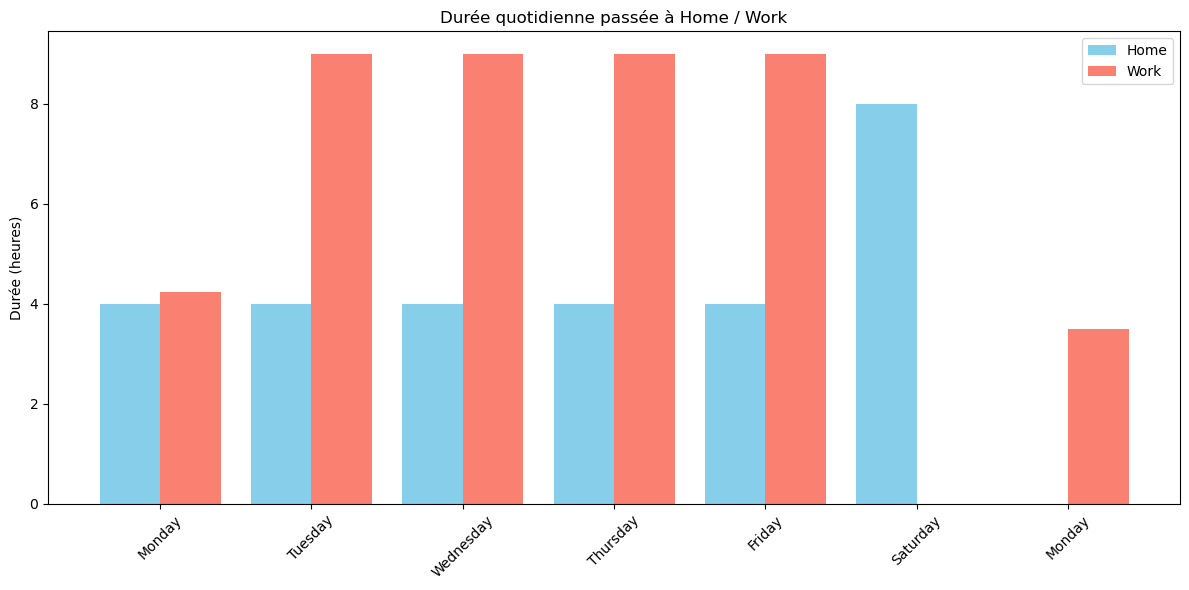

In [214]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
    'date': ['2019-10-21','2019-10-22','2019-10-23','2019-10-24','2019-10-25','2019-10-26','2019-10-28'],
    'home_min': [239.98, 239.98, 239.98, 239.98, 239.98, 479.97, 0.00],
    'work_min': [254.60, 540.00, 540.00, 540.00, 540.00, 0.00, 209.77]
}

df = pd.DataFrame(data)

# Convertir la colonne date en datetime et ajouter le nom du jour
df['date'] = pd.to_datetime(df['date'])
df['day_name'] = df['date'].dt.day_name()

# Convertir minutes en heures
df['home_hour'] = df['home_min'] / 60
df['work_hour'] = df['work_min'] / 60


# Tracer les deux histogrammes
x = range(len(df))
bar_width = 0.4

plt.figure(figsize=(12,6))

# Histogramme Home
plt.bar([i - bar_width/2 for i in x], df['home_hour'], width=bar_width, label='Home', color='skyblue')

# Histogramme Work
plt.bar([i + bar_width/2 for i in x], df['work_hour'], width=bar_width, label='Work', color='salmon')

# Ajouter les labels et titre
plt.xticks(x, df['day_name'], rotation=45)
plt.ylabel('Durée (heures)')
plt.title('Durée quotidienne passée à Home / Work')
plt.legend()
plt.tight_layout()
plt.show()


In [225]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import movingpandas as mpd
import json

# -------------------------------
# Préparation des données
# -------------------------------
# Vérifier que 'geometry' contient des Points
if not isinstance(stop_points_gdf['geometry'].iloc[0], Point):
    stop_points_gdf['geometry'] = stop_points_gdf['geometry'].apply(lambda x: Point(x))

# Convertir en GeoDataFrame
gdf_traj = gpd.GeoDataFrame(stop_points_gdf, geometry='geometry', crs="EPSG:4326")

# Convertir les dates en datetime
gdf_traj['start_time'] = pd.to_datetime(gdf_traj['start_time'])
gdf_traj['end_time'] = pd.to_datetime(gdf_traj['end_time'])

# Trier par date
gdf_traj = gdf_traj.sort_values('start_time')

# Création de trajectoires MovingPandas
trajectory = mpd.Trajectory(gdf_traj, traj_id='traj_id', t='start_time')
# Segmenter la trajectoire par jour
trj_day = mpd.TemporalSplitter(trajectory).split(mode="day")

# Export en MF-JSON (timestamps sérialisés)
mf_json_segments = [trj.to_mf_json() for trj in trj_day]

with open('trajectories_day.json', 'w') as f:
    json.dump(mf_json_segments, f, default=str)  # default=str pour gérer les Timestamps

print(f"Export terminé : {len(mf_json_segments)} segments sauvegardés !")


Export terminé : 7 segments sauvegardés !


C:\Users\latif\anaconda3\Lib\site-packages\movingpandas\trajectory_splitter.py:132: UserWarning: Temporal splitting results contain observation gaps that exceed your split size of D. Consider running the ObservationGapSplitter to further clean the results.
  warnings.warn(
C:\Users\latif\anaconda3\Lib\site-packages\movingpandas\trajectory_splitter.py:142: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[next_index] = next_values
C:\Users\latif\anaconda3\Lib\site-packages\movingpandas\trajectory.py:186: MissingCRSWarning: Trajectory generated without CRS. Computations will use Euclidean distances.
  warnings.warn(
C:\Users\latif\anaconda3\Lib\site-packages\movingpandas\trajectory_splitter.py:142: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the cave